### This project was taken from the following link and I use it to practice my skills
https://thecleverprogrammer.com/2021/06/06/whatsapp-chat-sentiment-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
!pip install emoji

In [2]:
!pip install wordcloud

In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## First test as the website

In [225]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm|"p. m.")? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

In [226]:
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [227]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(" ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [228]:
def getDatapoint2(line):
    splitline = line.split(' - ')
    datetime = splitline[0]
    message_author = " ".join(splitline[1:])
    splitmessage = message_author.split(": ")
    author = splitmessage[0]
    message = " ".join(splitmessage[1:])
    return datetime, author, message

In [229]:
data = []
conversation = 'Chat de WhatsApp con primos GLEZ.txt'

In [230]:
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [231]:
test = '19/08/15 4:37 p. m. - Adolfo Gonzalez Martinez: Jajajajajaj'
getDatapoint2(test)

('19/08/15 4:37 p. m.', 'Adolfo Gonzalez Martinez', 'Jajajajajaj')

In [232]:
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print(line)
        datetime, author, message = getDatapoint2(line)
        data.append([datetime, author, message])

19/08/15 4:37 p. m. - Adolfo Gonzalez Martinez: Jajajajajaj
19/08/15 4:38 p. m. - +52 999 322 4805: De vacaciones
19/08/15 4:39 p. m. - Talina: Jajajajajaja
19/08/15 6:57 p. m. - Nelda: Jajajajaja gracias a Dios de vacaciones y con mala señal 😜. Saludos
19/08/15 7:43 p. m. - Talina: Q " casualidad" la mala señal..... picarones jijiji
19/08/15 7:53 p. m. - Nelda: 🙊
20/08/15 9:35 a. m. - Talina: <Multimedia omitido>
20/08/15 9:39 a. m. - +52 999 198 2908: Jaja pero se emposmo
20/08/15 9:41 a. m. - Talina: Jijiji
20/08/15 9:46 a. m. - Ricardo Gonzalez: Tali tú no la has vencido
20/08/15 9:47 a. m. - Talina: Jajajajaaja si la vencí
20/08/15 9:47 a. m. - Talina: Ya toy cerca de la talla L
20/08/15 9:47 a. m. - Talina: 😂😂😂 y lo que me faltaaa
20/08/15 9:53 a. m. - Adolfo Gonzalez Martinez: Jajajajaja
20/08/15 11:34 a. m. - Nelda: Jajajajaja, buenos días a todos chicos, ya de regreso
03/09/15 8:28 a. m. - Marie Gonzalez: Alexxxx feliz cumpleaños!!!!!
03/09/15 8:28 a. m. - Marie Gonzalez: Te m

In [233]:
data

[['19/08/15 4:37 p.\xa0m.', 'Adolfo Gonzalez Martinez', 'Jajajajajaj'],
 ['19/08/15 4:38 p.\xa0m.', '+52 999 322 4805', 'De vacaciones'],
 ['19/08/15 4:39 p.\xa0m.', 'Talina', 'Jajajajajaja'],
 ['19/08/15 6:57 p.\xa0m.',
  'Nelda',
  'Jajajajaja gracias a Dios de vacaciones y con mala señal 😜. Saludos'],
 ['19/08/15 7:43 p.\xa0m.',
  'Talina',
  'Q " casualidad" la mala señal..... picarones jijiji'],
 ['19/08/15 7:53 p.\xa0m.', 'Nelda', '🙊'],
 ['20/08/15 9:35 a.\xa0m.', 'Talina', '<Multimedia omitido>'],
 ['20/08/15 9:39 a.\xa0m.', '+52 999 198 2908', 'Jaja pero se emposmo'],
 ['20/08/15 9:41 a.\xa0m.', 'Talina', 'Jijiji'],
 ['20/08/15 9:46 a.\xa0m.', 'Ricardo Gonzalez', 'Tali tú no la has vencido'],
 ['20/08/15 9:47 a.\xa0m.', 'Talina', 'Jajajajaaja si la vencí'],
 ['20/08/15 9:47 a.\xa0m.', 'Talina', 'Ya toy cerca de la talla L'],
 ['20/08/15 9:47 a.\xa0m.', 'Talina', '😂😂😂 y lo que me faltaaa'],
 ['20/08/15 9:53 a.\xa0m.', 'Adolfo Gonzalez Martinez', 'Jajajajaja'],
 ['20/08/15 11:34 

In [234]:
df = pd.DataFrame(data, columns=['DateTime', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))

TypeError: 'Series' object is not callable

## Second test, local try

In [4]:
test = 'Chat de WhatsApp con primos GLEZ.txt'
dates = []
messages = []
authors = []

In [5]:
with open(test, encoding='utf-8') as fp:
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        splitline = line.split(' - ')
        dt = splitline[0]
        dates.append(dt)
        message = splitline[1:]
        author_message = ' '.join(message)
        author_message = author_message.split(':', 1)
        author = author_message[0]
        authors.append(author)
        final_message = author_message[1:]
        messages.append(final_message)


In [6]:
messages

[[' <Multimedia omitido>'],
 [' Jajajajajaj'],
 [' De vacaciones'],
 [' Jajajajajaja'],
 [' Jajajajaja gracias a Dios de vacaciones y con mala señal 😜. Saludos'],
 [' Q " casualidad" la mala señal..... picarones jijiji'],
 [' 🙊'],
 [' <Multimedia omitido>'],
 [' Jaja pero se emposmo'],
 [' Jijiji'],
 [' Tali tú no la has vencido'],
 [' Jajajajaaja si la vencí'],
 [' Ya toy cerca de la talla L'],
 [' 😂😂😂 y lo que me faltaaa'],
 [' Jajajajaja'],
 [' Jajajajaja, buenos días a todos chicos, ya de regreso'],
 [' Alexxxx feliz cumpleaños!!!!!'],
 [' Te mando un abrazo fuerte!'],
 [' 😘'],
 [' Gracias marie.'],
 [' Alex feliz cumpleaños primo te mando un abrazo'],
 [' Gracias'],
 [' Felicidades!!! Q t consientan mucho!!'],
 [' Felicidades!!'],
 [' Muchas felicidades primo, que la pases de lujo y te consientan mucho'],
 [' Feliz cumpleeeeee!!!🎂🎂🎂'],
 [' Gracias'],
 [' Felicidades primo!!! Sigues de viaje??'],
 [' 🐳🐬🐟🐠🌴🌴🌴🌴☀🍊🍋🎶🎶🍻🍻🍻🍸🍸🍸'],
 [' Alex muchas felicidades éxito en tu viaje'],
 [' Vas a 

In [7]:
dates

['19/08/15 4:37 p.\xa0m.',
 '19/08/15 4:37 p.\xa0m.',
 '19/08/15 4:38 p.\xa0m.',
 '19/08/15 4:39 p.\xa0m.',
 '19/08/15 6:57 p.\xa0m.',
 '19/08/15 7:43 p.\xa0m.',
 '19/08/15 7:53 p.\xa0m.',
 '20/08/15 9:35 a.\xa0m.',
 '20/08/15 9:39 a.\xa0m.',
 '20/08/15 9:41 a.\xa0m.',
 '20/08/15 9:46 a.\xa0m.',
 '20/08/15 9:47 a.\xa0m.',
 '20/08/15 9:47 a.\xa0m.',
 '20/08/15 9:47 a.\xa0m.',
 '20/08/15 9:53 a.\xa0m.',
 '20/08/15 11:34 a.\xa0m.',
 '03/09/15 8:28 a.\xa0m.',
 '03/09/15 8:28 a.\xa0m.',
 '03/09/15 8:28 a.\xa0m.',
 '03/09/15 8:29 a.\xa0m.',
 '03/09/15 8:32 a.\xa0m.',
 '03/09/15 8:32 a.\xa0m.',
 '03/09/15 8:37 a.\xa0m.',
 '03/09/15 8:59 a.\xa0m.',
 '03/09/15 8:59 a.\xa0m.',
 '03/09/15 9:00 a.\xa0m.',
 '03/09/15 9:01 a.\xa0m.',
 '03/09/15 9:15 a.\xa0m.',
 '03/09/15 9:21 a.\xa0m.',
 '03/09/15 9:28 a.\xa0m.',
 '03/09/15 9:28 a.\xa0m.',
 '03/09/15 9:30 a.\xa0m.',
 '03/09/15 9:34 a.\xa0m.',
 '03/09/15 9:34 a.\xa0m.',
 '03/09/15 9:35 a.\xa0m.',
 '03/09/15 9:35 a.\xa0m.',
 '03/09/15 9:41 a.\xa0m.',


In [8]:
dates_df = pd.DataFrame(dates, columns=['date'])
dates_df

date
0      19/08/15 4:37 p. m.
1      19/08/15 4:37 p. m.
2      19/08/15 4:38 p. m.
3      19/08/15 4:39 p. m.
4      19/08/15 6:57 p. m.
...                    ...
24475  08/07/22 8:12 p. m.
24476  08/07/22 8:13 p. m.
24477  08/07/22 8:14 p. m.
24478  08/07/22 8:14 p. m.
24479  08/07/22 8:15 p. m.

[24480 rows x 1 columns]

In [9]:
authors_df = pd.DataFrame(authors, columns=['Author'])
authors_df

Author
0                  Siqui Gonzalez
1        Adolfo Gonzalez Martinez
2                +52 999 322 4805
3                          Talina
4                           Nelda
...                           ...
24475            +52 442 173 0404
24476            +52 442 173 0404
24477  Marta Alicia Diaz Gonzalez
24478  Marta Alicia Diaz Gonzalez
24479  Marta Alicia Diaz Gonzalez

[24480 rows x 1 columns]

In [10]:
messages_df = pd.DataFrame(messages)
messages_df

0
0                                   <Multimedia omitido>
1                                            Jajajajajaj
2                                          De vacaciones
3                                           Jajajajajaja
4       Jajajajaja gracias a Dios de vacaciones y con...
...                                                  ...
24475   Dependiendo de lo que quieran hacer y cuántas...
24476   Con mucho gusto te oriento de zonas convenien...
24477   Si Hubi incluyendo la Cuauhtémoc que es donde...
24478            Y es una zona súper comunicada con todo
24479   Pero si quieres restaurantes y más entretenim...

[24480 rows x 1 columns]

In [11]:
data = pd.concat([dates_df, authors_df, messages_df], axis=1)
data.head(50)

date                      Author  \
0    19/08/15 4:37 p. m.              Siqui Gonzalez   
1    19/08/15 4:37 p. m.    Adolfo Gonzalez Martinez   
2    19/08/15 4:38 p. m.            +52 999 322 4805   
3    19/08/15 4:39 p. m.                      Talina   
4    19/08/15 6:57 p. m.                       Nelda   
5    19/08/15 7:43 p. m.                      Talina   
6    19/08/15 7:53 p. m.                       Nelda   
7    20/08/15 9:35 a. m.                      Talina   
8    20/08/15 9:39 a. m.            +52 999 198 2908   
9    20/08/15 9:41 a. m.                      Talina   
10   20/08/15 9:46 a. m.            Ricardo Gonzalez   
11   20/08/15 9:47 a. m.                      Talina   
12   20/08/15 9:47 a. m.                      Talina   
13   20/08/15 9:47 a. m.                      Talina   
14   20/08/15 9:53 a. m.    Adolfo Gonzalez Martinez   
15  20/08/15 11:34 a. m.                       Nelda   
16   03/09/15 8:28 a. m.              Marie Gonzalez   
17   03/09/15 8:28 a. m.              Marie Gonzalez   
18   03/09/15 8:28 a. m.              Marie Gonzalez   
19   03/09/15 8:29 a. m.            +52 999 322 4805   
20   03/09/15 8:32 a. m.                       Chovi   
21   03/09/15 8:32 a. m.            +52 999 322 4805   
22   03/09/15 8:37 a. m.                      Talina   
23   03/09/15 8:59 a. m.            Ricardo Gonzalez   
24   03/09/15 8:59 a. m.    Adolfo Gonzalez Martinez   
25   03/09/15 9:00 a. m.              Marcela Medina   
26   03/09/15 9:01 a. m.            +52 999 322 4805   
27   03/09/15 9:15 a. m.              Siqui Gonzalez   
28   03/09/15 9:21 a. m.                      Talina   
29   03/09/15 9:28 a. m.            +52 999 198 2908   
30   03/09/15 9:28 a. m.    Adolfo Gonzalez Martinez   
31   03/09/15 9:30 a. m.            +52 999 198 2908   
32   03/09/15 9:34 a. m.           Mariana Glz Trava   
33   03/09/15 9:34 a. m.              Siqui Gonzalez   
34   03/09/15 9:35 a. m.            +52 999 198 2908   
35   03/09/15 9:35 a. m.           Mariana Glz Trava   
36   03/09/15 9:41 a. m.    Adolfo Gonzalez Martinez   
37  03/09/15 10:07 a. m.                       Nelda   
38  03/09/15 11:44 a. m.  Marta Alicia Diaz Gonzalez   
39  03/09/15 12:02 p. m.            +52 999 322 4805   
40  03/09/15 12:02 p. m.            +52 999 322 4805   
41  03/09/15 12:02 p. m.            +52 999 322 4805   
42  03/09/15 12:07 p. m.              Siqui Gonzalez   
43  03/09/15 12:07 p. m.              Siqui Gonzalez   
44  03/09/15 12:07 p. m.              Siqui Gonzalez   
45  03/09/15 12:09 p. m.                      Talina   
46  03/09/15 12:11 p. m.    Adolfo Gonzalez Martinez   
47  03/09/15 12:56 p. m.              Siqui Gonzalez   
48  03/09/15 12:57 p. m.              Marcela Medina   
49   03/09/15 2:40 p. m.            +52 999 322 4805   

                                                    0  
0                                <Multimedia omitido>  
1                                         Jajajajajaj  
2                                       De vacaciones  
3                                        Jajajajajaja  
4    Jajajajaja gracias a Dios de vacaciones y con...  
5    Q " casualidad" la mala señal..... picarones ...  
6                                                   🙊  
7                                <Multimedia omitido>  
8                                Jaja pero se emposmo  
9                                              Jijiji  
10                          Tali tú no la has vencido  
11                            Jajajajaaja si la vencí  
12                         Ya toy cerca de la talla L  
13                            😂😂😂 y lo que me faltaaa  
14                                         Jajajajaja  
15   Jajajajaja, buenos días a todos chicos, ya de...  
16                      Alexxxx feliz cumpleaños!!!!!  
17                         Te mando un abrazo fuerte!  
18                                                  😘  
19                                     Grac

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24480 entries, 0 to 24479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    24480 non-null  object
 1   Author  24480 non-null  object
 2   0       22460 non-null  object
dtypes: object(3)
memory usage: 573.9+ KB


In [13]:
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22460 entries, 0 to 24479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22460 non-null  object
 1   Author  22460 non-null  object
 2   0       22460 non-null  object
dtypes: object(3)
memory usage: 701.9+ KB


In [15]:
data.columns = ['Date', 'Author', 'Message']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22460 entries, 0 to 24479
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     22460 non-null  object
 1   Author   22460 non-null  object
 2   Message  22460 non-null  object
dtypes: object(3)
memory usage: 701.9+ KB


In [17]:
data['Date'] = data['Date'].str.replace('.','')

C:\Users\52551\AppData\Local\Temp\ipykernel_9164\804476557.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Date'] = data['Date'].str.replace('.','')


In [24]:
data['Date'] = data['Date'].str[:-1]

In [25]:
data.Date

0        19/08/15 4:37 p
1        19/08/15 4:37 p
2        19/08/15 4:38 p
3        19/08/15 4:39 p
4        19/08/15 6:57 p
              ...       
24475    08/07/22 8:12 p
24476    08/07/22 8:13 p
24477    08/07/22 8:14 p
24478    08/07/22 8:14 p
24479    08/07/22 8:15 p
Name: Date, Length: 22460, dtype: object

In [26]:
data['Date'] = data['Date'].astype(str)+'m'

In [27]:
data.Date

0        19/08/15 4:37 pm
1        19/08/15 4:37 pm
2        19/08/15 4:38 pm
3        19/08/15 4:39 pm
4        19/08/15 6:57 pm
               ...       
24475    08/07/22 8:12 pm
24476    08/07/22 8:13 pm
24477    08/07/22 8:14 pm
24478    08/07/22 8:14 pm
24479    08/07/22 8:15 pm
Name: Date, Length: 22460, dtype: object

In [28]:
data.head()

Date                    Author  \
0  19/08/15 4:37 pm            Siqui Gonzalez   
1  19/08/15 4:37 pm  Adolfo Gonzalez Martinez   
2  19/08/15 4:38 pm          +52 999 322 4805   
3  19/08/15 4:39 pm                    Talina   
4  19/08/15 6:57 pm                     Nelda   

                                             Message  
0                               <Multimedia omitido>  
1                                        Jajajajajaj  
2                                      De vacaciones  
3                                       Jajajajajaja  
4   Jajajajaja gracias a Dios de vacaciones y con...

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22460 entries, 0 to 24479
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     22460 non-null  object
 1   Author   22460 non-null  object
 2   Message  22460 non-null  object
dtypes: object(3)
memory usage: 701.9+ KB


In [30]:
print('Total Messages: ', data.shape[0])

Total Messages:  22460


In [31]:
data.Message.value_counts()

 <Multimedia omitido>                                                                              4490
 😘                                                                                                  115
 Jajajaja                                                                                            97
 😂                                                                                                   94
 😍                                                                                                   86
                                                                                                   ... 
 _te eliminó del grupo_                                                                               1
 *Salió del grupo*                                                                                    1
 Pensé que nos habíamos librado de ti 😉 Jajajaja                                                      1
 Mejor invítame una 🍻                                           

In [32]:
print('Archivos enviados: ', data[data['Message'] == ' <Multimedia omitido>'].shape[0])

Archivos enviados:  4490


In [33]:
data.head(50)

Date                      Author  \
0    19/08/15 4:37 pm              Siqui Gonzalez   
1    19/08/15 4:37 pm    Adolfo Gonzalez Martinez   
2    19/08/15 4:38 pm            +52 999 322 4805   
3    19/08/15 4:39 pm                      Talina   
4    19/08/15 6:57 pm                       Nelda   
5    19/08/15 7:43 pm                      Talina   
6    19/08/15 7:53 pm                       Nelda   
7    20/08/15 9:35 am                      Talina   
8    20/08/15 9:39 am            +52 999 198 2908   
9    20/08/15 9:41 am                      Talina   
10   20/08/15 9:46 am            Ricardo Gonzalez   
11   20/08/15 9:47 am                      Talina   
12   20/08/15 9:47 am                      Talina   
13   20/08/15 9:47 am                      Talina   
14   20/08/15 9:53 am    Adolfo Gonzalez Martinez   
15  20/08/15 11:34 am                       Nelda   
16   03/09/15 8:28 am              Marie Gonzalez   
17   03/09/15 8:28 am              Marie Gonzalez   
18   03/09/15 8:28 am              Marie Gonzalez   
19   03/09/15 8:29 am            +52 999 322 4805   
20   03/09/15 8:32 am                       Chovi   
21   03/09/15 8:32 am            +52 999 322 4805   
22   03/09/15 8:37 am                      Talina   
23   03/09/15 8:59 am            Ricardo Gonzalez   
24   03/09/15 8:59 am    Adolfo Gonzalez Martinez   
25   03/09/15 9:00 am              Marcela Medina   
26   03/09/15 9:01 am            +52 999 322 4805   
27   03/09/15 9:15 am              Siqui Gonzalez   
28   03/09/15 9:21 am                      Talina   
29   03/09/15 9:28 am            +52 999 198 2908   
30   03/09/15 9:28 am    Adolfo Gonzalez Martinez   
31   03/09/15 9:30 am            +52 999 198 2908   
32   03/09/15 9:34 am           Mariana Glz Trava   
33   03/09/15 9:34 am              Siqui Gonzalez   
34   03/09/15 9:35 am            +52 999 198 2908   
35   03/09/15 9:35 am           Mariana Glz Trava   
36   03/09/15 9:41 am    Adolfo Gonzalez Martinez   
37  03/09/15 10:07 am                       Nelda   
38  03/09/15 11:44 am  Marta Alicia Diaz Gonzalez   
39  03/09/15 12:02 pm            +52 999 322 4805   
40  03/09/15 12:02 pm            +52 999 322 4805   
41  03/09/15 12:02 pm            +52 999 322 4805   
42  03/09/15 12:07 pm              Siqui Gonzalez   
43  03/09/15 12:07 pm              Siqui Gonzalez   
44  03/09/15 12:07 pm              Siqui Gonzalez   
45  03/09/15 12:09 pm                      Talina   
46  03/09/15 12:11 pm    Adolfo Gonzalez Martinez   
47  03/09/15 12:56 pm              Siqui Gonzalez   
48  03/09/15 12:57 pm              Marcela Medina   
49   03/09/15 2:40 pm            +52 999 322 4805   

                                              Message  
0                                <Multimedia omitido>  
1                                         Jajajajajaj  
2                                       De vacaciones  
3                                        Jajajajajaja  
4    Jajajajaja gracias a Dios de vacaciones y con...  
5    Q " casualidad" la mala señal..... picarones ...  
6                                                   🙊  
7                                <Multimedia omitido>  
8                                Jaja pero se emposmo  
9                                              Jijiji  
10                          Tali tú no la has vencido  
11                            Jajajajaaja si la vencí  
12                         Ya toy cerca de la talla L  
13                            😂😂😂 y lo que me faltaaa  
14                                         Jajajajaja  
15   Jajajajaja, buenos días a todos chicos, ya de...  
16                      Alexxxx feliz cumpleaños!!!!!  
17                         Te mando un abrazo fuerte!  
18                                                  😘  
19                                     Gracias marie.  
20     Alex feliz cumpleaños primo te mando un abrazo  
21                                            Gracias  
22              Felicidad

In [34]:
data.iloc[6,2]

' 🙊'

In [35]:
x = 'Yo te mando 💋💋💋💋'
emoji_data_test = regex.findall(r'\X', x)
for word in emoji_data_test:
    if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):
        print(word)


💋
💋
💋
💋


C:\Users\52551\AppData\Local\Temp\ipykernel_9164\1889768787.py:4: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):


In [36]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):
            emoji_list.append(word)
    return emoji_list

In [37]:
data['emoji'] = data['Message'].apply(split_count)

C:\Users\52551\AppData\Local\Temp\ipykernel_9164\1342332995.py:5: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):


In [38]:
emojis = sum(data['emoji'].str.len())
print(emojis)

10666


In [39]:
omitidos = data[data['Message'] == ' <Multimedia omitido>']
omitidos

Date                           Author  \
0      19/08/15 4:37 pm                   Siqui Gonzalez   
7      20/08/15 9:35 am                           Talina   
170    10/09/15 2:51 pm                 Ricardo Gonzalez   
269    11/09/15 3:51 pm  Luis Guillermo Gonzalez Liceaga   
291    11/09/15 6:54 pm                Mariana Glz Trava   
...                 ...                              ...   
24448  02/07/22 5:19 pm         Cecilia Gonzalez Liceaga   
24449  02/07/22 5:38 pm                Mariana Glz Trava   
24451  02/07/22 5:47 pm         Cecilia Gonzalez Liceaga   
24459  05/07/22 6:11 pm                 +52 442 173 0404   
24460  07/07/22 6:42 pm                   Siqui Gonzalez   

                     Message emoji  
0       <Multimedia omitido>    []  
7       <Multimedia omitido>    []  
170     <Multimedia omitido>    []  
269     <Multimedia omitido>    []  
291     <Multimedia omitido>    []  
...                      ...   ...  
24448   <Multimedia omitido>    []  
24449   <Multimedia omitido>    []  
24451   <Multimedia omitido>    []  
24459   <Multimedia omitido>    []  
24460   <Multimedia omitido>    []  

[4490 rows x 4 columns]

In [40]:
data_messages = data.drop(omitidos.index)

In [41]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17970 entries, 1 to 24479
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     17970 non-null  object
 1   Author   17970 non-null  object
 2   Message  17970 non-null  object
 3   emoji    17970 non-null  object
dtypes: object(4)
memory usage: 702.0+ KB


In [42]:
data_messages['Letter count'] = data_messages['Message'].apply(lambda x: len(x))
data_messages['Word count'] = data_messages['Message'].apply(lambda x: len(x.split(' ')))
data_messages['Message count'] = 1

In [43]:
data_messages.Author.unique()

array(['Adolfo Gonzalez Martinez', '+52 999 322 4805', 'Talina', 'Nelda',
       '+52 999 198 2908', 'Ricardo Gonzalez', 'Marie Gonzalez', 'Chovi',
       'Marcela Medina', 'Siqui Gonzalez', 'Mariana Glz Trava',
       'Marta Alicia Diaz Gonzalez', 'Ceci Gonzalez Liceaga',
       'Luis Guillermo Gonzalez Liceaga', 'Leslie Taméz',
       'Irma Madariaga', 'Cecilia Gonzalez Liceaga', 'Aaron Zimmerman',
       'Joaquin Gonzalez', '+1 (713) 858-7124', 'Gelos Gonzalez',
       'Lucy Gonzalez', '+52 55 6166 7949', 'Emilio Gonzalez',
       'Paco Glz Mtz', '+49 174 3941786', '+1 (832) 293-3865',
       '+1 (403) 863-5521', '+52 999 101 1358', '+52 984 114 2406',
       '+52 967 672 3553', '+507 6566-6103', '+52 442 353 5294',
       'Alex Cano', '+52 987 117 6163', '+52 55 1082 1091',
       '+52 55 7344 4259', '+52 442 173 0404', 'Fatboy Slim 20',
       'New Order 13', '+52 999 747 1821', '+1 (346) 219-1604'],
      dtype=object)

In [45]:
l = ['Alex Cano', 'Nelda', 'Leslie Taméz', 'Joaquin Gonzalez']
for i in range(len(l)):
    # Filter the user
    req_df = data_messages[data_messages['Author'] == l[i]]
    print(f'Stats of {l[i]}')
    # Qty of messages sent
    print('Messages sent', req_df.shape[0])
    # Avg words per user
    words_per_msg = (np.sum(req_df['Word count']))/req_df.shape[0]
    print('Average words per message: ', words_per_msg)
    # Media sent by user
    media = omitidos[omitidos['Author'] == l[i]].shape[0]
    print('Media messages sent: ', media)
    # Emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis sent: ', emojis)

Stats of Alex Cano
Messages sent 251
Average words per message:  5.952191235059761
Media messages sent:  109
Emojis sent:  187
Stats of Nelda
Messages sent 1922
Average words per message:  8.711238293444328
Media messages sent:  345
Emojis sent:  1531
Stats of Leslie Taméz
Messages sent 591
Average words per message:  6.060913705583756
Media messages sent:  62
Emojis sent:  522
Stats of Joaquin Gonzalez
Messages sent 28
Average words per message:  7.392857142857143
Media messages sent:  3
Emojis sent:  2


In [47]:
total_emojis_list = list(set([a for b in data_messages.emoji for a in b]))
total_emojis = len(total_emojis_list)
total_emojis

393

In [48]:
total_emojis_list = list([a for b in data_messages.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

('😘', 1822)
('😂', 1550)
('😍', 719)
('👏🏻', 564)
('🤣', 320)
('🎉', 310)
('😁', 235)
('👏', 220)
('👍🏻', 187)
('🤗', 154)
('😱', 138)
('👍🏼', 138)
('❤', 130)
('👏🏼', 130)
('🥰', 125)
('🥳', 120)
('😜', 119)
('🎊', 118)
('💕', 117)
('🙏🏻', 106)
('🎂', 105)
('😉', 85)
('😊', 83)
('😄', 74)
('😋', 73)
('👍', 71)
('🤔', 71)
('🙌🏻', 71)
('😭', 64)
('🍻', 61)
('😃', 61)
('💗', 59)
('🤤', 56)
('😢', 54)
('❤️', 52)
('🎁', 51)
('🎈', 49)
('😬', 46)
('😳', 45)
('🙈', 43)
('🍾', 43)
('😀', 40)
('🤩', 39)
('🍷', 38)
('👆🏻', 37)
('🙄', 37)
('🤭', 37)
('😅', 36)
('☺', 35)
('🙏🏼', 33)
('👌🏻', 32)
('💐', 31)
('😎', 30)
('💞', 30)
('🍺', 28)
('👼🏼', 28)
('🙅🏻', 28)
('🙌', 28)
('💖', 27)
('🙏', 26)
('💃🏼', 26)
('👌', 26)
('💃🏻', 25)
('🍰', 25)
('💛', 25)
('😝', 23)
('👼🏻', 23)
('🎄', 22)
('🌷', 21)
('🐷', 20)
('🥂', 20)
('🤦🏻\u200d♀', 20)
('👀', 18)
('😔', 18)
('😵', 18)
('🤟🏻', 18)
('🙃', 17)
('💓', 17)
('👶🏼', 17)
('🎩', 16)
('🙊', 15)
('💃', 15)
('👌🏼', 15)
('🔥', 15)
('💪', 14)
('🤪', 14)
('🍸', 13)
('😕', 13)
('💙', 13)
('🤟', 13)
('😛', 12)
('🙂', 12)
('😒', 11)
('😡', 11)
('😚', 11)
(

In [49]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0       😘   1822
1       😂   1550
2       😍    719
3      👏🏻    564
4       🤣    320
..    ...    ...
388     🐾      1
389     🫶      1
390  🏄‍♂️      1
391     🫅      1
392     🥹      1

[393 rows x 2 columns]

In [50]:
import plotly.express as px

In [53]:
fig = px.pie(emoji_df.head(10), values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [60]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('spanish')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\52551\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def clean(text):
    text = str(text).lower()
    text = regex.sub('\[.*?\]', '', text)
    text = regex.sub('https?://\S+|www\.\S+', '', text)
    text = regex.sub('<.*?>+', '', text)
    text = regex.sub('[%s]' % regex.escape(string.punctuation), '', text)
    text = regex.sub('\n', '', text)
    text = regex.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [64]:
data_messages['text'] = data_messages['Message'].apply(clean)

In [65]:
text = ' '.join(i for i in data_messages.text)
print('There are {} words in all the messages'.format(len(text)))

There are 381993 words in all the messages


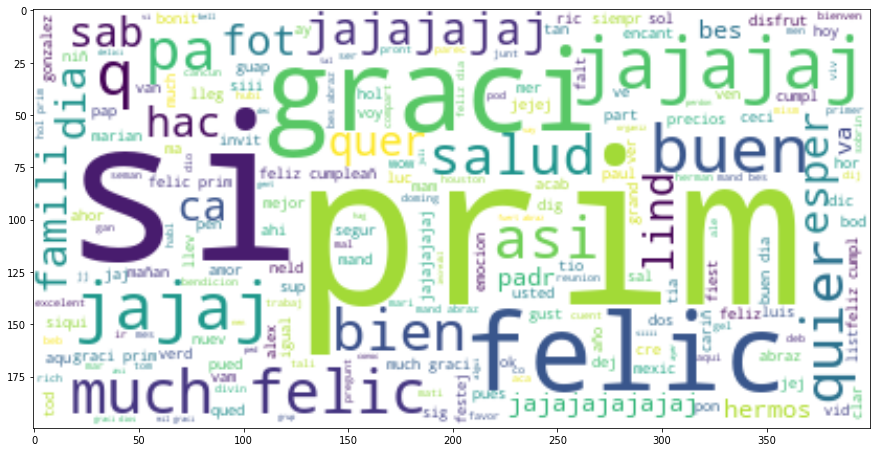

In [66]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

C:\Users\52551\AppData\Local\Temp\ipykernel_9164\1087988737.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Author is:  Alex Cano


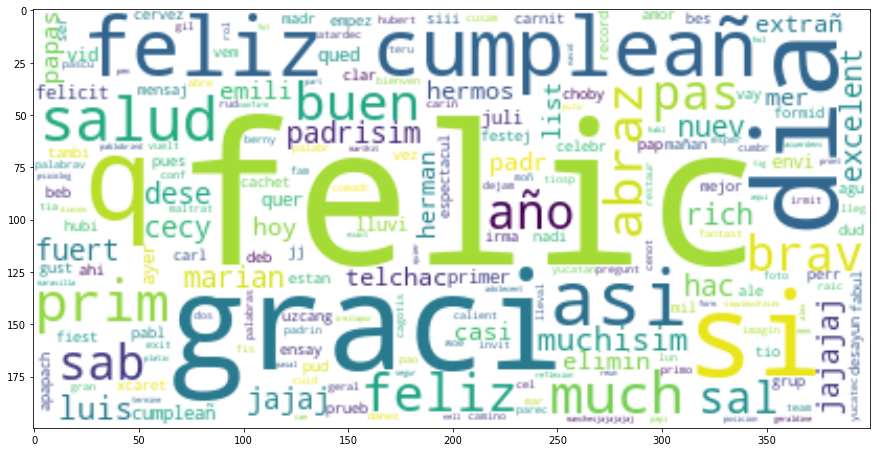

Author is:  Nelda


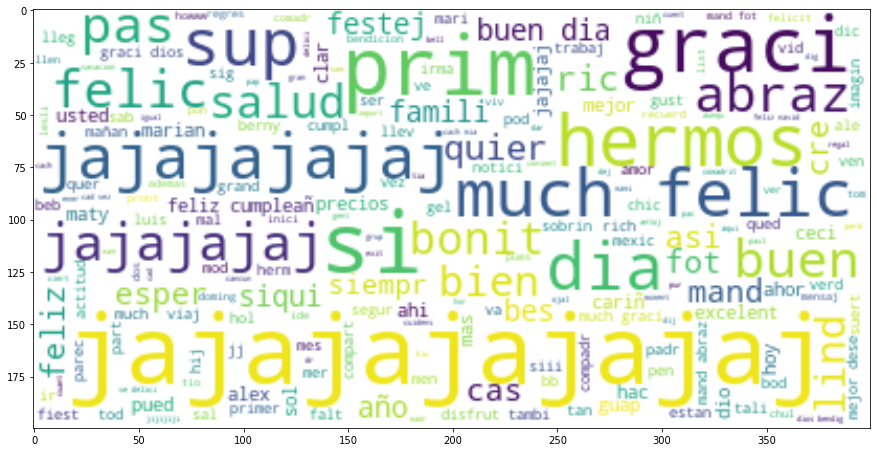

Author is:  Leslie Taméz


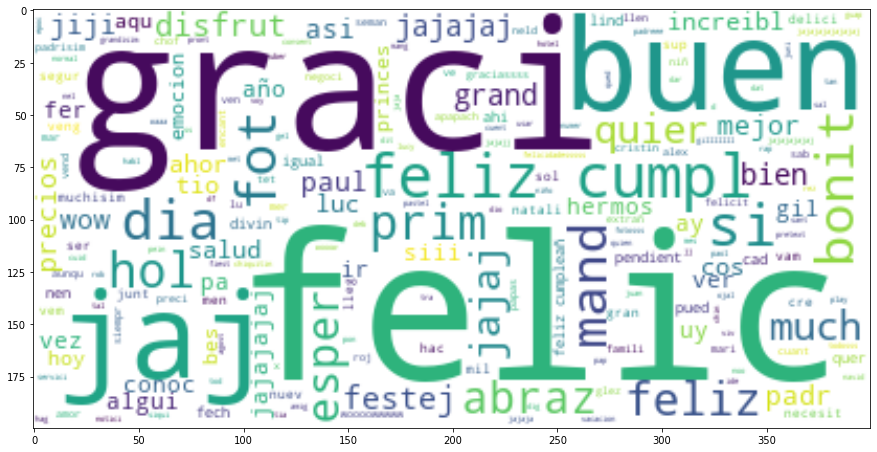

Author is:  Joaquin Gonzalez


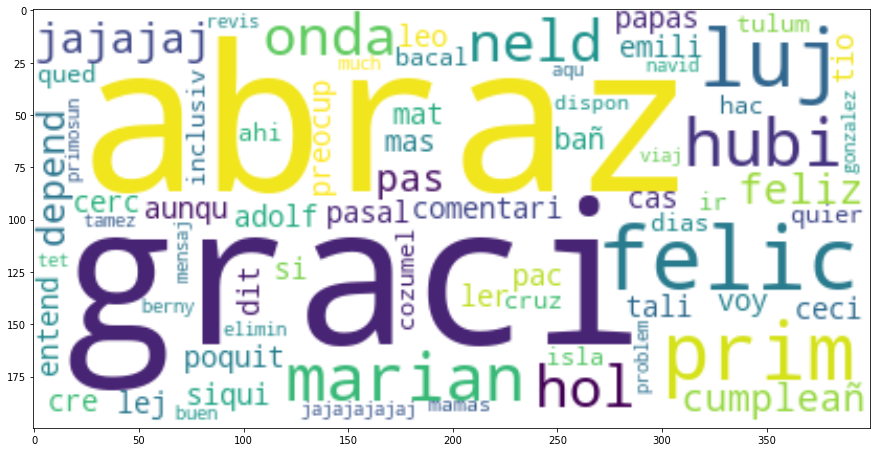

In [67]:
for i in range(len(l)):
    dummy_df = data_messages[data_messages['Author'] == l[i]]
    dummy_df['text'] = dummy_df['Message'].apply(clean)
    text = ' '.join(i for i in dummy_df.text)
    stopwords = set(STOPWORDS)
    print('Author is: ', l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()